## Marcus Miles, Rita Levine, Rafael Nunez, Edita Diunov-Uster - Group Project

### BAN 7750-70 - Financial Analytics
### July 22,2019


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load data from excel spreadsheet with relevant information

stock = pd.read_excel(r'C:\Users\DaBeast2\histretSP.xls', header = 17)

#Renaming the Headers for more clarity
stock.rename(columns={'S&P 500 (includes dividends)':'SP500','3-month T.Bill':'ThreeMosTBill','Return on 10-year T. Bond':'ReturnOn10yrTBond', 'T.Bills':"T_Bills",
        'T.Bonds':'T_Bonds',
       'Stocks - Bills':'Stocks_Bills', 'Stocks - Bonds':'Stocks_Bonds', 'Historical risk premium':'HistRiskPrem',
       'Inflation Rate':'InflationRate', 'S&P 500 (includes dividends)2':'SP500_2',
       '3-month T. Bill (Real)':'Real3MosTBill', '!0-year T.Bonds':'TenYrTBonds'}, inplace = True)
stock = stock[:-10]
stock

,Year,SP500,ThreeMosTBill,ReturnOn10yrTBond,Stocks,T_Bills,T_Bonds,Stocks_Bills,Stocks_Bonds,HistRiskPrem,InflationRate,SP500_2,Real3MosTBill,TenYrTBonds
0,1928,0.438112,0.030800,0.008355,143.811155,103.08,100.835,0.407312,0.429757,0.000000,-0.0175,0.463727,0.049160,0.026315
1,1929,-0.082979,0.031600,0.042038,131.877782,106.337,105.074,-0.114579,-0.125018,0.123322,0.0000,-0.082979,0.031600,0.042038
2,1930,-0.251236,0.045500,0.045409,98.745288,111.176,109.846,-0.296736,-0.296646,-0.035997,-0.0240,-0.232824,0.071209,0.071116
3,1931,-0.438375,0.023100,-0.025589,55.457774,113.744,107.035,-0.461475,-0.412787,-0.154182,-0.0987,-0.376873,0.135138,0.081118
4,1932,-0.086424,0.010700,0.087903,50.664911,114.961,116.444,-0.0971236,-0.174327,-0.158062,-0.1095,0.025914,0.134980,0.221677
5,1933,0.499822,0.009600,0.018553,75.988361,116.065,118.604,0.490222,0.48127,-0.073578,-0.0538,0.585101,0.067005,0.076467
6,1934,-0.011886,0.003225,0.079634,75.085189,116.439,128.049,-0.0151107,-0.0915201,-0.076060,0.0299,-0.040573,-0.025901,0.048291
7,1935,0.467404,0.001750,0.044720,110.180323,116.643,133.775,0.465654,0.422684,-0.024851,0.0219,0.435957,-0.019718,0.022331
8,1936,0.319434,0.001700,0.050179,145.375676,116.841,140.488,0.317734,0.269255,0.003954,0.0144,0.300704,-0.012520,0.035271
9,1937,-0.353367,0.003025,0.013791,94.004668,117.194,142.426,-0.356392,-0.367159,-0.042161,0.0347,-0.375053,-0.030613,-0.020207


In [4]:
#Converts variables of object type = object to data type float to help with describing the data
stock['T_Bills'] = stock.T_Bills.astype(float)
stock['T_Bonds'] = stock.T_Bonds.astype(float)
stock['Stocks_Bills'] = stock.Stocks_Bills.astype(float)
stock['Stocks_Bonds'] = stock.Stocks_Bonds.astype(float)

stock.head()

,Year,SP500,ThreeMosTBill,ReturnOn10yrTBond,Stocks,T_Bills,T_Bonds,Stocks_Bills,Stocks_Bonds,HistRiskPrem,InflationRate,SP500_2,Real3MosTBill,TenYrTBonds
0,1928,0.438112,0.0308,0.008355,143.811155,103.080000,100.835471,0.407312,0.429757,0.000000,-0.0175,0.463727,0.049160,0.026315
1,1929,-0.082979,0.0316,0.042038,131.877782,106.337328,105.074397,-0.114579,-0.125018,0.123322,0.0000,-0.082979,0.031600,0.042038
2,1930,-0.251236,0.0455,0.045409,98.745288,111.175676,109.845753,-0.296736,-0.296646,-0.035997,-0.0240,-0.232824,0.071209,0.071116
3,1931,-0.438375,0.0231,-0.025589,55.457774,113.743835,107.034958,-0.461475,-0.412787,-0.154182,-0.0987,-0.376873,0.135138,0.081118
4,1932,-0.086424,0.0107,0.087903,50.664911,114.960894,116.443660,-0.097124,-0.174327,-0.158062,-0.1095,0.025914,0.134980,0.221677


In [5]:
stock.describe(include='all')

,Year,SP500,ThreeMosTBill,ReturnOn10yrTBond,Stocks,T_Bills,T_Bonds,Stocks_Bills,Stocks_Bonds,HistRiskPrem,InflationRate,SP500_2,Real3MosTBill,TenYrTBonds
count,91.0,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
unique,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.113563,0.034256,0.050970,52883.836118,700.789959,1655.366008,0.079307,0.062592,0.033534,0.028245,0.084073,0.006668,0.023217
std,NaN,0.195815,0.030400,0.076994,91627.632749,708.196449,2234.532904,0.198958,0.211943,0.043802,0.036268,0.195644,0.035470,0.080828
min,NaN,-0.438375,0.000250,-0.111167,50.664911,103.080000,100.835471,-0.461475,-0.566536,-0.158062,-0.109500,-0.388161,-0.106543,-0.132985
25%,NaN,-0.011984,0.009612,0.008776,397.696755,125.262572,198.978290,-0.032951,-0.092259,0.035163,0.014400,-0.030004,-0.010698,-0.027256
50%,NaN,0.135244,0.030450,0.032746,4080.444016,272.162424,372.571132,0.095153,0.078464,0.049664,0.027700,0.103932,0.008171,0.010514
75%,NaN,0.244462,0.050900,0.083433,68850.939047,1276.415707,2495.247674,0.213581,0.200324,0.055036,0.040900,0.200108,0.022659,0.069280


In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 14 columns):
Year                 91 non-null object
SP500                91 non-null float64
ThreeMosTBill        91 non-null float64
ReturnOn10yrTBond    91 non-null float64
Stocks               91 non-null float64
T_Bills              91 non-null float64
T_Bonds              91 non-null float64
Stocks_Bills         91 non-null float64
Stocks_Bonds         91 non-null float64
HistRiskPrem         91 non-null float64
InflationRate        91 non-null float64
SP500_2              91 non-null float64
Real3MosTBill        91 non-null float64
TenYrTBonds          91 non-null float64
dtypes: float64(13), object(1)
memory usage: 10.0+ KB


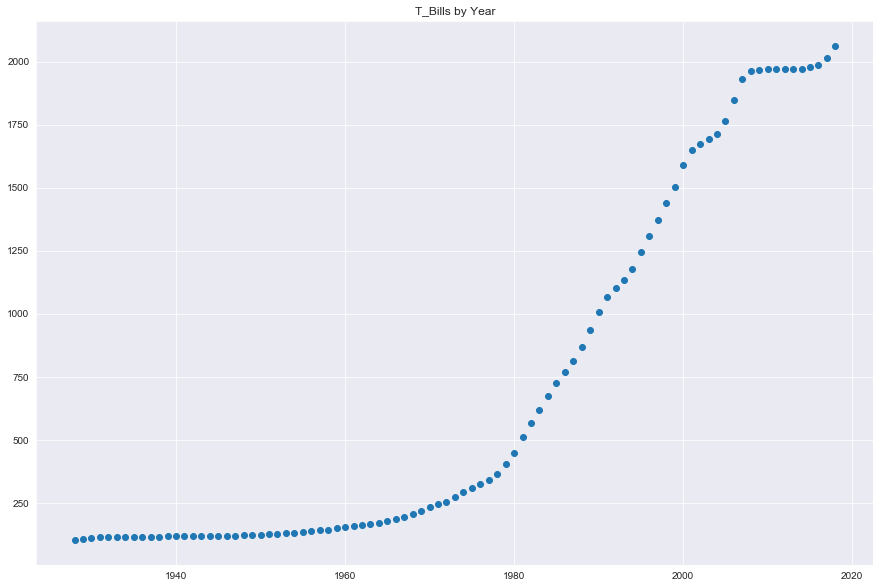

In [7]:
sns.set_style("darkgrid")
axes = plt.subplots(figsize = (15,10))
plt.scatter(stock.Year, stock.T_Bills)
plt.title("T_Bills by Year")
plt.show()

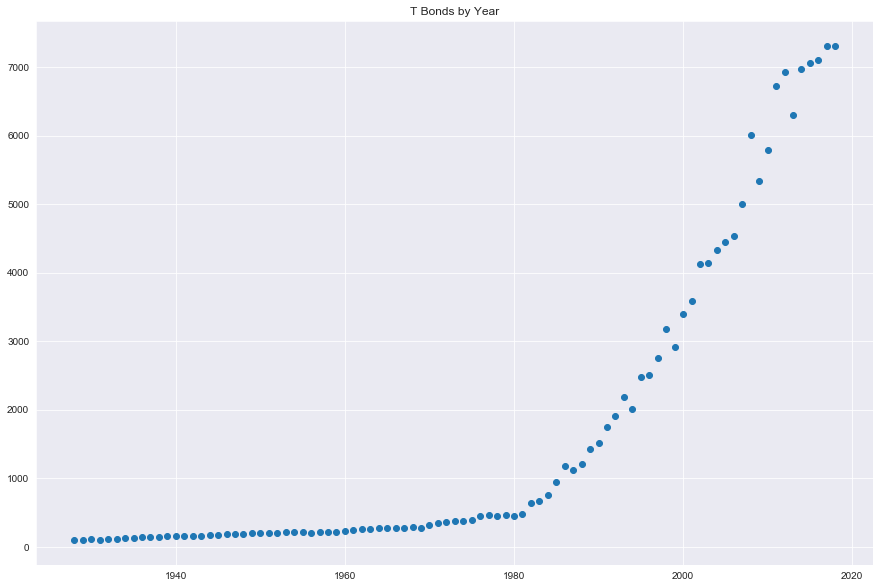

In [8]:
axes = plt.subplots(figsize = (15,10))
plt.scatter(stock.Year, stock.T_Bonds)
plt.title("T Bonds by Year")
plt.show()

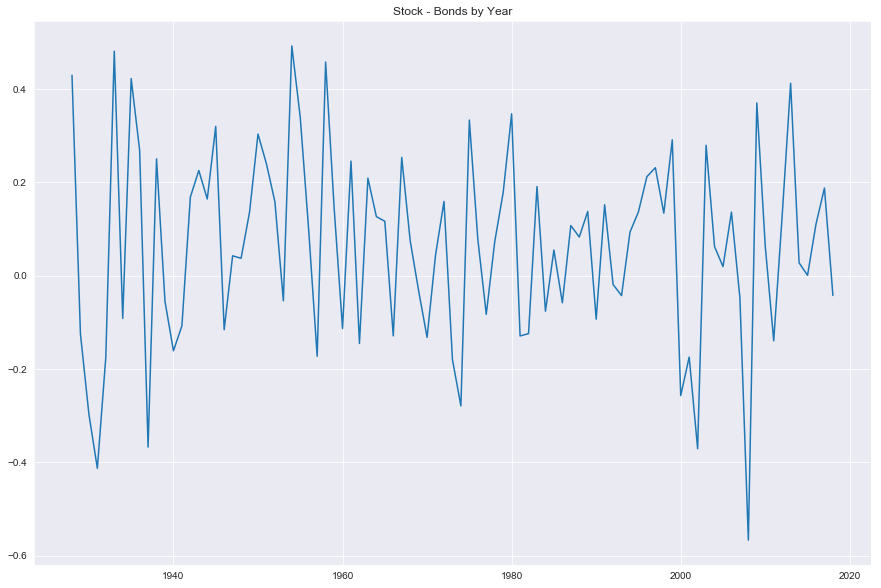

In [9]:
axes = plt.subplots(figsize = (15,10))
plt.plot(stock.Year, stock.Stocks_Bonds)
plt.title("Stock - Bonds by Year")
plt.show()

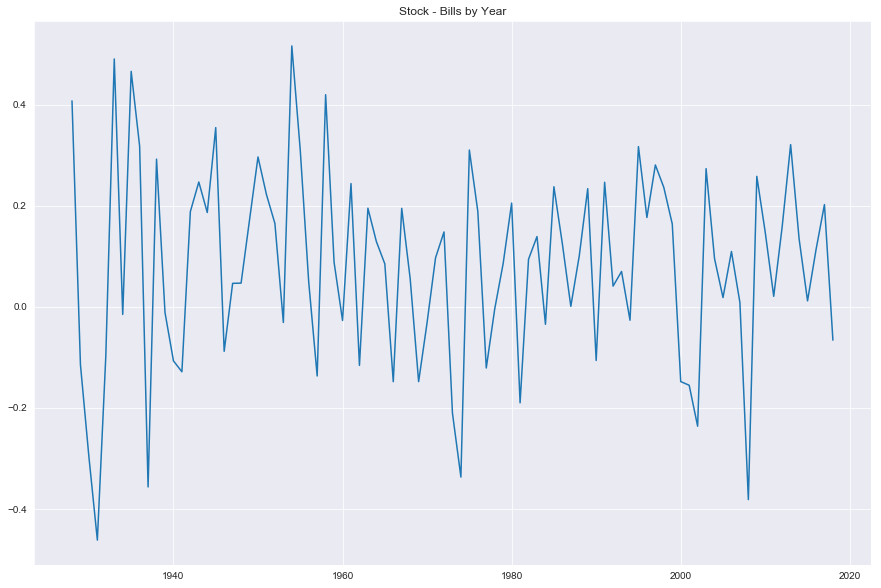

In [10]:
axes = plt.subplots(figsize = (15,10))
plt.plot(stock.Year, stock.Stocks_Bills)
plt.title("Stock - Bills by Year")
plt.show()

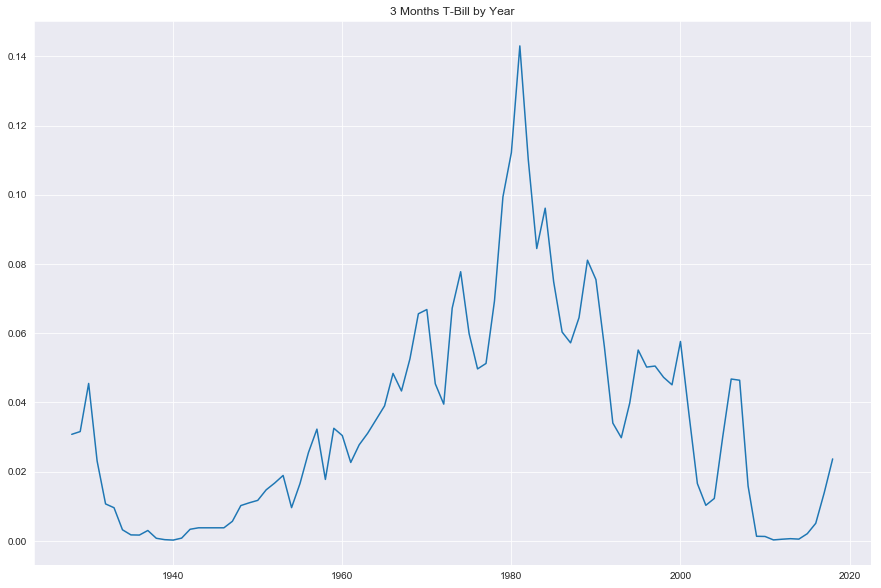

In [18]:
axes = plt.subplots(figsize = (15,10))
plt.plot(stock.Year, stock.ThreeMosTBill)
plt.title("3 Months T-Bill by Year")
plt.show()

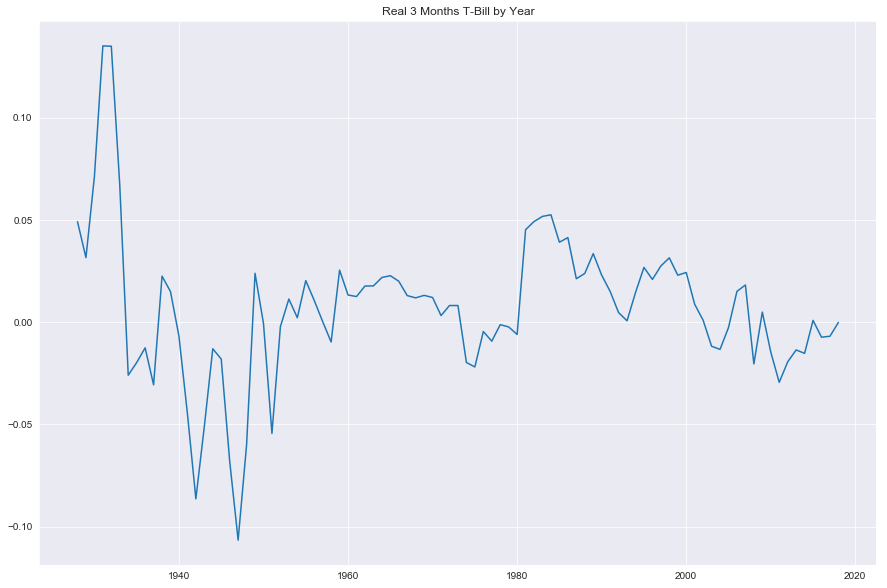

In [19]:
axes = plt.subplots(figsize = (15,10))
plt.plot(stock.Year, stock.Real3MosTBill)
plt.title("Real 3 Months T-Bill by Year")
plt.show()

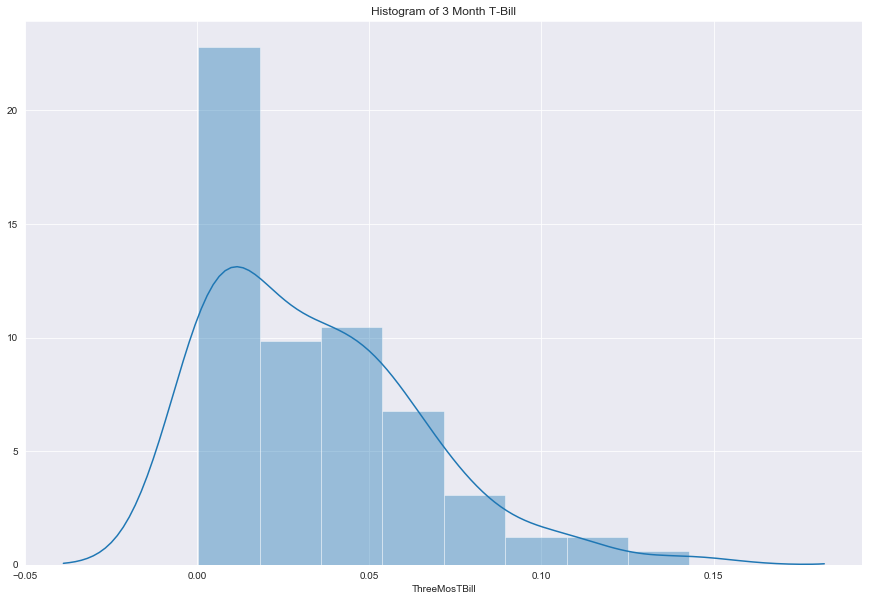

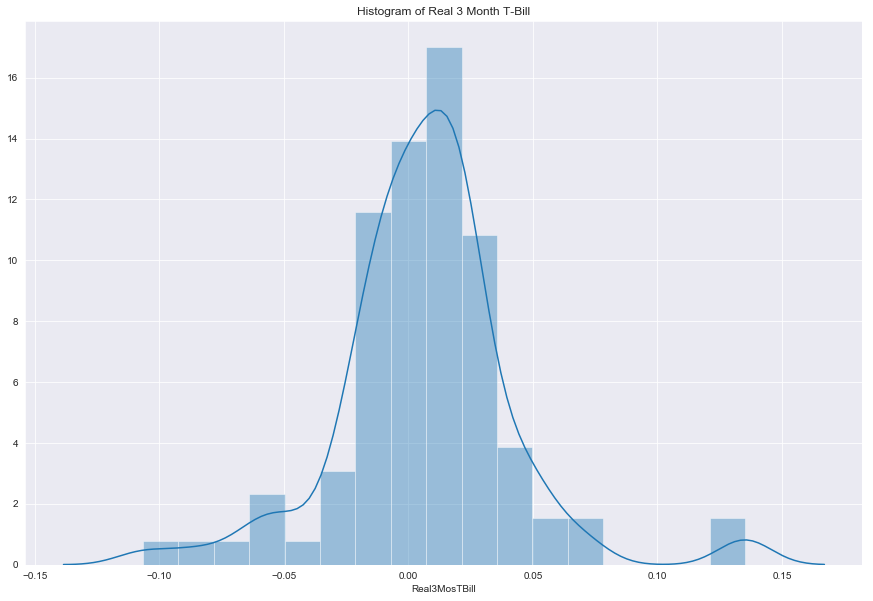

In [20]:
axes = plt.subplots(figsize = (15,10))
sns.distplot(stock.ThreeMosTBill)
plt.title("Histogram of 3 Month T-Bill")
plt.show()

axes = plt.subplots(figsize = (15,10))
sns.distplot(stock.Real3MosTBill)
plt.title("Histogram of Real 3 Month T-Bill")
plt.show()

#Histogram shows that the 3 Month T-Bill is right skewed with the data whereas the Real 3 months T-Bill has more of 
##a normal distribution. 

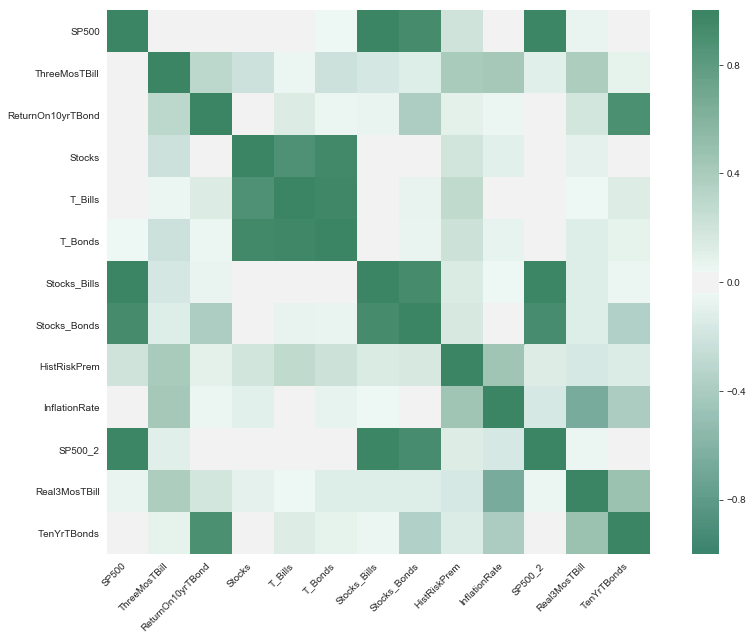

In [13]:
#Next we are going to find which features are correlated with each other within the data
corr = stock.corr()
axes = plt.subplots(figsize = (15,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(160, 150, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [14]:
#Next, we will perform a linear regression on the data for the variables that seem highly correlated.
#First we'll split the data into our independent and dependent variables
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = pd.DataFrame(stock.Stocks_Bills)
y = pd.DataFrame(stock.SP500)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 1.0, 'Predictions of S&P 500 and Stocks-Bills')

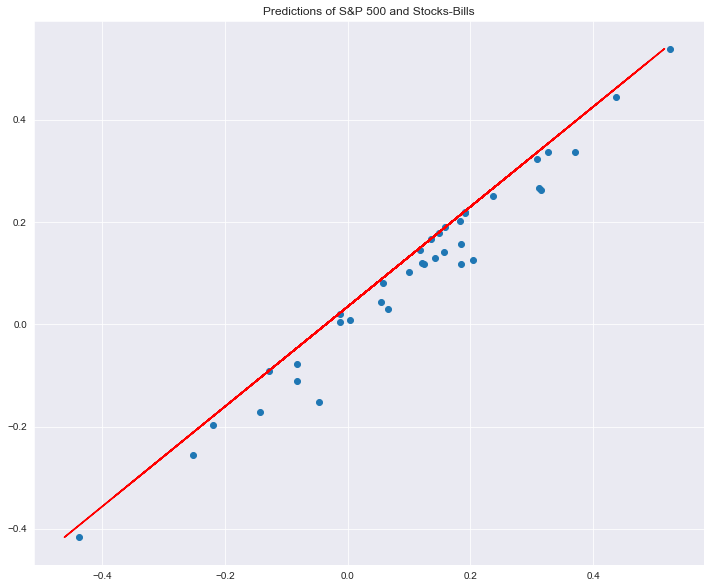

In [15]:
predictions = lm.predict(X_test)
Y_pred = lm.predict(X)

axes = plt.subplots(figsize = (12,10))
plt.scatter(y_test,predictions)
plt.plot(X,Y_pred, color = 'red')
plt.title("Predictions of S&P 500 and Stocks-Bills")

In [16]:
#Training a regression model for the SP500 and Stocks-Bonds

X = pd.DataFrame(stock.Stocks_Bonds)
y = pd.DataFrame(stock.SP500)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 1.0, 'Predictions of S&P 500 and Stocks-Bonds')

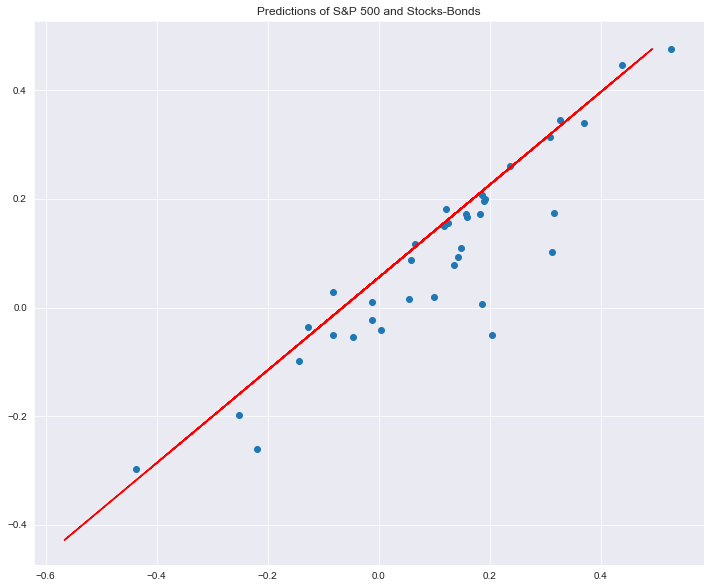

In [17]:
predictions = lm.predict(X_test)
Y_pred = lm.predict(X)

axes = plt.subplots(figsize = (12,10))
plt.scatter(y_test,predictions)
plt.plot(X,Y_pred, color = 'red')
plt.title("Predictions of S&P 500 and Stocks-Bonds")